# Домашнее задание 

В этом задании мы попрактикуемся в методах снижения размерности и кластеризации данных. 

Мы будем работать с набором данных Samsung Human Activity Recognition. Скачайте данные по ссылке https://archive.ics.uci.edu/ml/machine-learning-databases/00240/. Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3, также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице.

Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [3]:
X_train = np.loadtxt("C:/Users/Дина/Desktop/X_train.txt")
y_train = np.loadtxt("C:/Users/Дина/Desktop/y_train.txt").astype(int)

X_test = np.loadtxt("C:/Users/Дина/Desktop/X_test.txt")
y_test = np.loadtxt("C:/Users/Дина/Desktop/y_test.txt").astype(int)

Для кластеризации нам не нужен вектор ответов. Объедините обучающую и тестовую выборки.

In [4]:
#your code here
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

In [5]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

Эти метки соответствуют:

1 - ходьбе,
2 - подъему вверх по лестнице,
3 - спуску по лестнице,
4 - сидению,
5 - стоянию,
6 - лежанию

Отмасштабируйте выборку с помощью StandardScaler.

In [6]:
#your code here
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled.mean()

7.169205691685069e-16

Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте random_state.

In [8]:
#your code here
pca = PCA(n_components=65, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

Подбор n_components:

In [9]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_explained_variance >= 0.9) + 1 
n_components

1

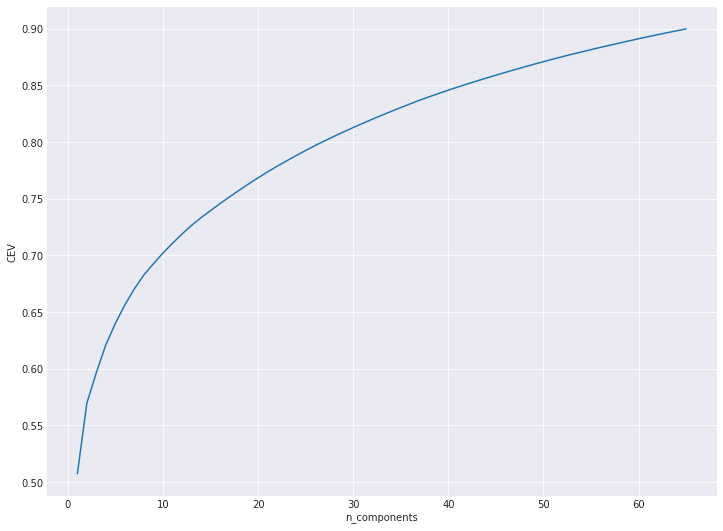

In [10]:
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('n_components')
plt.ylabel('CEV')
plt.show()

Визуализируйте данные в проекции на первые две главные компоненты.

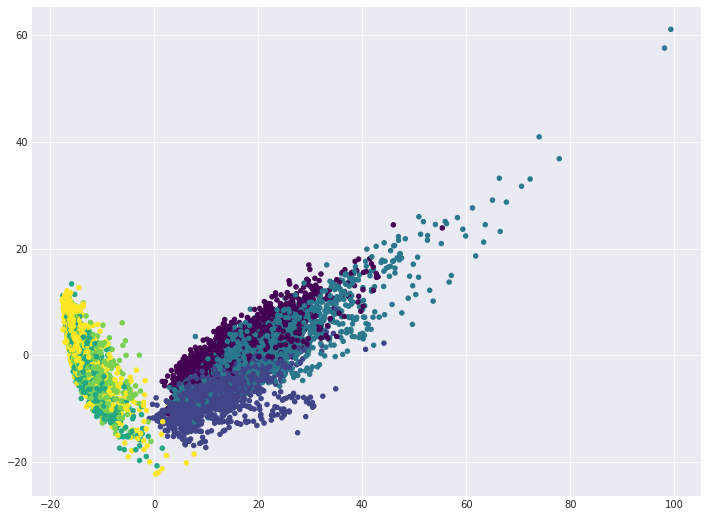

In [11]:
#your code here
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, s=20, cmap='viridis')

Сделайте кластеризацию данных методом KMeans, обучив модель на данных со сниженной за счет PCA размерностью. В данном случае нужно искать 6 кластеров (так как у нас 6 классов).

Параметры:

n_clusters = n_classes (число уникальных меток целевого класса)

n_init = 100

random_state = RANDOM_STATE (для воспроизводимости результата)

In [12]:
#your code here
kmeans = KMeans(n_clusters=6, random_state=RANDOM_STATE, n_init=100)
kmeans.fit(X_pca)

KMeans(n_clusters=6, n_init=100, random_state=17)

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

Text(0, 0.5, 'y')

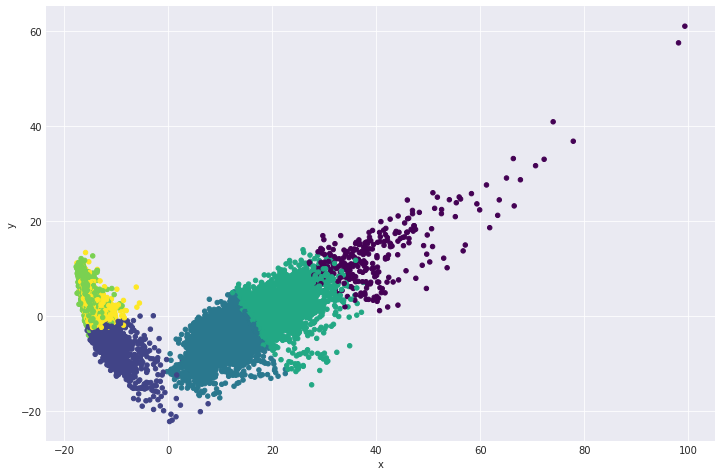

In [13]:
#your code here
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, s=20, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

Выведите на экран значения метрик качества кластеризации

In [14]:
#your code here
labels = y

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, kmeans.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, kmeans.labels_))
print("Adjusted mutual info score: %.3f"
      % metrics.adjusted_mutual_info_score(labels, kmeans.labels_))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, kmeans.labels_, sample_size=1000))

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

Homogeneity: 0.541
Completeness: 0.581
V-measure: 0.560
Adjusted Rand-Index: 0.420
Adjusted mutual info score: 0.560
Silhouette Coefficient: 0.148


Теперь попробуем сделать кластеризацию с помощью AgglomerativeClustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [15]:
ag = AgglomerativeClustering(n_clusters=6, 
                             linkage='ward').fit(X_pca)
clusters = ag.fit(X_pca)
clusters

AgglomerativeClustering(n_clusters=6)

Выведите метрики качества для полученного разбиения на кластеры. Сравните с kmeans. Запишите выводы!

In [16]:
#your code here
labels = y

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, ag.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, ag.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, ag.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, ag.labels_))
print("Adjusted mutual info score: %.3f"
      % metrics.adjusted_mutual_info_score(labels, ag.labels_))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, ag.labels_, sample_size=1000)) # агломеративная кластеризация получилась получше

Homogeneity: 0.607
Completeness: 0.623
V-measure: 0.615
Adjusted Rand-Index: 0.488
Adjusted mutual info score: 0.615
Silhouette Coefficient: 0.100


Попробуйте применить другие методы кластеризации из sklearn. Также вычислите метрики качества и сделайте вывод о том, какой метод сработал лучше.

In [17]:
# для интереса решила сравнить kmeans и minibatch kmeans
from sklearn.cluster import MiniBatchKMeans

k_means = MiniBatchKMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE)
k_means.fit(X)

MiniBatchKMeans(n_clusters=6, n_init=100, random_state=17)

Text(0, 0.5, 'y')

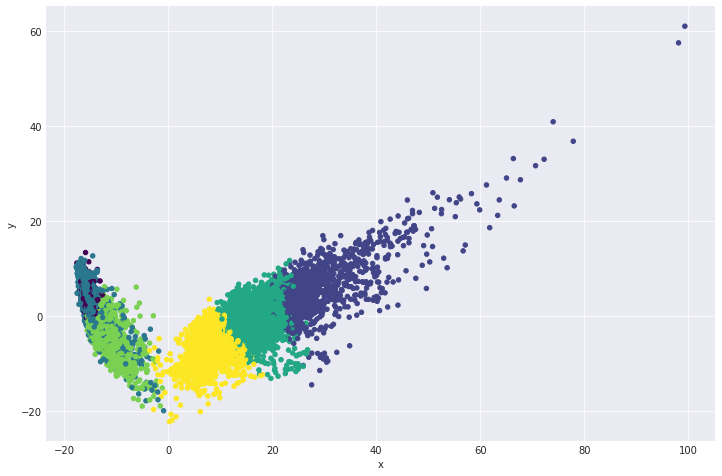

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=k_means.labels_, s=20, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

In [37]:
labels = y

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, k_means.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, k_means.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, k_means.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, k_means.labels_))
print("Adjusted mutual info score: %.3f"
      % metrics.adjusted_mutual_info_score(labels, k_means.labels_))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, k_means.labels_, sample_size=1000)) # не супер круто, но чуть лучше, чем обычный kmeans

Homogeneity: 0.597
Completeness: 0.601
V-measure: 0.599
Adjusted Rand-Index: 0.477
Adjusted mutual info score: 0.599
Silhouette Coefficient: 0.102


In [33]:
from sklearn.cluster import Birch

brc = Birch(n_clusters=6)
brc.fit(X_pca)

Birch(n_clusters=6)

Text(0, 0.5, 'y')

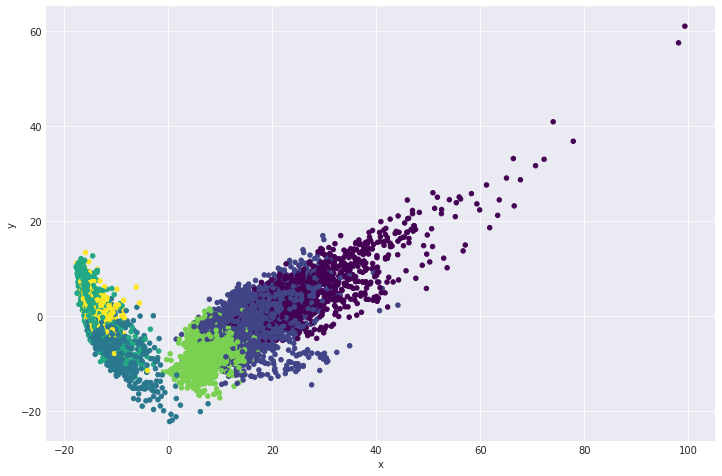

In [34]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=brc.labels_, s=20, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

In [36]:
labels = y

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, brc.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, brc.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, brc.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, brc.labels_))
print("Adjusted mutual info score: %.3f"
      % metrics.adjusted_mutual_info_score(labels, brc.labels_))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, brc.labels_, sample_size=1000)) # метрики получились почти идентичные агломеративной кластеризации

Homogeneity: 0.607
Completeness: 0.623
V-measure: 0.615
Adjusted Rand-Index: 0.488
Adjusted mutual info score: 0.615
Silhouette Coefficient: 0.093


Для самой успешной из полученных кластеризаций попробуйте дать интерпретацию кластеров. Опишите характеристики объектов, попавших в каждый кластер. Для этого можете ответить на следующие вопросы:

* похожи ли объекты внутри каждого кластера на определенный тип активности человека?
* в каких кластерах смешано несколько типов активности? С чем, на ваш взгляд, это может быть связано?
* качественная ли получилась кластеризация? На основании чего вы можете сделать такой вывод?

In [ ]:
# your text here